Data Cleaning-New York City Airbnb

The purpose of this data cleaning project is to refine and enhance the New York City Airbnb Open Data to ensure 
it is accurate, reliable, and ready for insightful analysis.

In [1]:
#importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:
Airbnb_dataset=pd.read_csv('AB_NYC_2019.csv')

In [4]:
Airbnb_dataset.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [5]:
print("Number of rows and columns",Airbnb_dataset.shape)


Number of rows and columns (48895, 16)


In [6]:
Airbnb_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Data cleaning

1)checking for data types


In [7]:
Airbnb_dataset.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

column "last_review" has a dataype object which needs to be converted to date

In [8]:
# Convert 'last_review' column to datetime
Airbnb_dataset['last_review'] = pd.to_datetime(Airbnb_dataset['last_review'], errors='coerce')

In [9]:
Airbnb_dataset.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

2)checking for duplicate values

In [10]:
Airbnb_dataset.duplicated().sum()

0

no duplicates in dataset

3)checking for consistency

The strings in the dataset are inconsistent in case, so we need to convert them all to lowercase for uniformity.

In [11]:
Airbnb_dataset = Airbnb_dataset.map(lambda x: x.lower() if isinstance(x, str) else x)

Airbnb_dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,clean & quiet apt home by the park,2787,john,brooklyn,kensington,40.64749,-73.97237,private room,149,1,9,2018-10-19,0.21,6,365
1,2595,skylit midtown castle,2845,jennifer,manhattan,midtown,40.75362,-73.98377,entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,the village of harlem....new york !,4632,elisabeth,manhattan,harlem,40.80902,-73.94190,private room,150,3,0,NaT,NaN,1,365
3,3831,cozy entire floor of brownstone,4869,lisaroxanne,brooklyn,clinton hill,40.68514,-73.95976,entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,entire apt: spacious studio/loft by central park,7192,laura,manhattan,east harlem,40.79851,-73.94399,entire home/apt,80,10,9,2018-11-19,0.10,1,0


4)checking for null values

In [12]:
Airbnb_dataset.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

from above we see that columns "name","host_name","last_review","reviews_per_month" have null values.
dropping critical null values can impact loss of valuable information, inconsistent results.

so we can replace it with most repeating values as it is a large data set.

In [13]:
# correcting name column
# Calculate the mode for each room_type
mode_names = Airbnb_dataset.groupby('room_type')['name'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

print(mode_names)

room_type
entire home/apt                                home away from home
private room                                          private room
shared room        amazing cozy and warm male room on manhattan iv
Name: name, dtype: object


In [14]:
# Function to replace null values with the mode
def replace_null_with_mode(row):
    if pd.isna(row['name']):
        return mode_names[row['room_type']]
    return row['name']

# Apply the function to the DataFrame
Airbnb_dataset['name'] = Airbnb_dataset.apply(replace_null_with_mode, axis=1)

Airbnb_dataset['room_type'].isna().sum()

0

In [15]:
# correcting host_name column
# Calculate the mode for each room_type
mode_names1 = Airbnb_dataset.groupby('room_type')['host_name'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

print(mode_names1)

room_type
entire home/apt    sonder (nyc)
private room              david
shared room              sergii
Name: host_name, dtype: object


In [16]:
# Function to replace null values with the mode
def replace_null_with_mode(row):
    if pd.isna(row['host_name']):
        return mode_names1[row['room_type']]
    return row['host_name']

# Apply the function to the DataFrame
Airbnb_dataset['host_name'] = Airbnb_dataset.apply(replace_null_with_mode, axis=1)

Airbnb_dataset['room_type'].isna().sum()

0

In [17]:
# Calculate the mode of the last_review column
mode_last_review = Airbnb_dataset['last_review'].mode().iloc[0] if not Airbnb_dataset['last_review'].mode().empty else np.nan

# Replace NaN values in last_review column with the mode
Airbnb_dataset['last_review'] = Airbnb_dataset['last_review'].fillna(mode_last_review)

In [18]:
# Calculate the mode of the reviews_per_month column
mode_reviews_per_month = Airbnb_dataset['reviews_per_month'].mode().iloc[0] if not Airbnb_dataset['reviews_per_month'].mode().empty else np.nan

# Replace NaN values in reviews_per_month column with the mode
Airbnb_dataset['reviews_per_month'] = Airbnb_dataset['reviews_per_month'].fillna(mode_reviews_per_month)

In [19]:
Airbnb_dataset.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

5) Outlier detection and handling (price column)

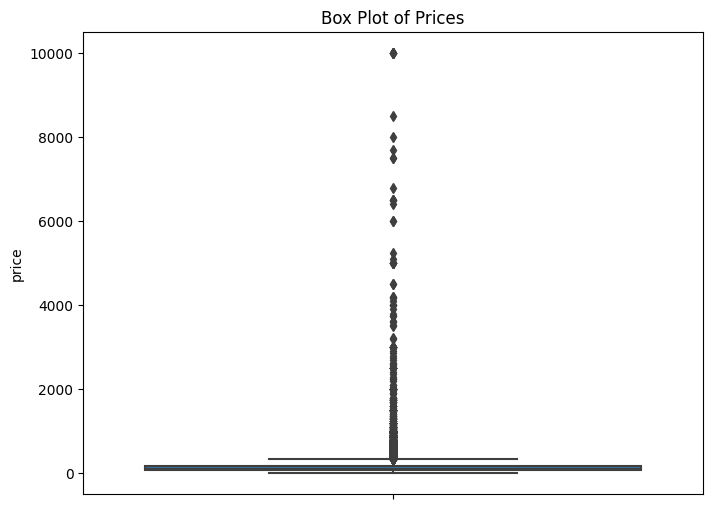

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=Airbnb_dataset['price'])
plt.title('Box Plot of Prices')
plt.show()


In [21]:
Airbnb_dataset.shape

(48895, 16)

In [22]:
# Calculate Z-scores
z_scores = stats.zscore(Airbnb_dataset['price'])
df_no_outliers = Airbnb_dataset[(z_scores < 3) & (z_scores > -3)]

print("\nDataFrame After Removing Outliers:")
print(df_no_outliers)


DataFrame After Removing Outliers:
             id                                               name   host_id  \
0          2539                 clean & quiet apt home by the park      2787   
1          2595                              skylit midtown castle      2845   
2          3647                the village of harlem....new york !      4632   
3          3831                    cozy entire floor of brownstone      4869   
4          5022   entire apt: spacious studio/loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      affordable room in bushwick/east williamsburg   6570630   
48892  36485431            sunny studio at historical neighborhood  23492952   
48893  36485609               43rd st. time square-cozy single bed  30985759   
48894  36487245  trendy duplex in the very heart of hell's kitchen  68119814   

   

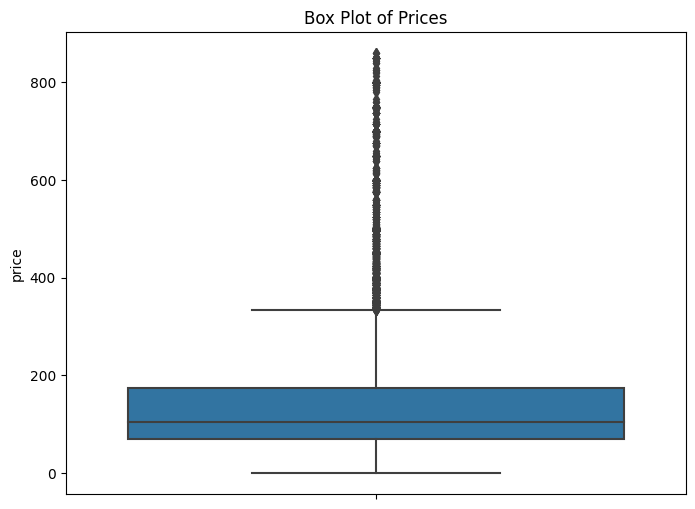

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_no_outliers['price'])
plt.title('Box Plot of Prices')
plt.show()